In [33]:
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


This number is 1


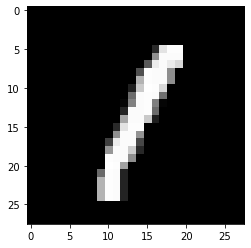

In [34]:
#Load the training and test datasets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#display one of the digits from X
index = 77
first_image = train_images[index]
first_label = train_labels[index]
first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
print("This number is", first_label)

In [35]:
test_images = test_images.reshape((10000, 28*28))
train_images = train_images.reshape((60000, 28*28))
print(test_images[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

In [36]:
train_images = train_images/255
test_images = test_images/255

In [37]:
before_categ_test_labels = test_labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [38]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(256, activation = 'tanh'))
network.add(layers.Dense(128, activation = 'sigmoid'))
network.add(layers.Dense(10, activation='softmax'))


In [39]:
network.compile(optimizer = 'rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [40]:
network.fit(train_images, train_labels, epochs=7, batch_size=64)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print (network.summary())


Epoch 1/7
938/938 [==============================] - 8s 9ms/step - loss: 0.2248 - accuracy: 0.9347
Epoch 2/7
938/938 [==============================] - 8s 9ms/step - loss: 0.0867 - accuracy: 0.9741
Epoch 3/7
938/938 [==============================] - 9s 9ms/step - loss: 0.0613 - accuracy: 0.9817
Epoch 4/7
938/938 [==============================] - 9s 10ms/step - loss: 0.0463 - accuracy: 0.9858
Epoch 5/7
938/938 [==============================] - 10s 10ms/step - loss: 0.0336 - accuracy: 0.9899
Epoch 6/7
938/938 [==============================] - 9s 10ms/step - loss: 0.0261 - accuracy: 0.9922
Epoch 7/7
313/313 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9757
test_acc: 0.9757000207901001
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                      